In [1]:
import numpyro
import numpyro.distributions as dist
from numpyro.infer import DiscreteHMCGibbs, MCMC, NUTS, MixedHMC, HMC
from jax import random
import jax.numpy as jnp
import plotly.express as px
import plotly.io as pio
import numpy as np
from scipy import stats
import pyvinecopulib as pv
from pyvinecopulib import Bicop
import graphviz
import funsor

In [2]:
pio.renderers.default = "jupyterlab"

Z <--- X ---> Y

In [3]:
# Specify pair-copulas
# https://notebook.community/vinecopulib/pyvinecopulib/examples/bivariate_copulas
bicop_1_2 = pv.Bicop(
    family=pv.BicopFamily.clayton, 
    rotation=90,
    parameters=[5]
)
bicop_1_2_sims = bicop_1_2.simulate(
    n=500,
    qrng=True
)
px.scatter(
    x=bicop_1_2_sims[:, 0],
    y=bicop_1_2_sims[:, 1]
)

In [4]:

bicop_1_3 = pv.Bicop(
    family=pv.BicopFamily.student, 
    rotation=0,
    parameters=[0.78, 2]
)
bicop_1_3_sims = bicop_1_3.simulate(
    n=500,
    qrng=True
)
px.scatter(
    x=bicop_1_3_sims[:, 0],
    y=bicop_1_3_sims[:, 1]
)

In [5]:
bicop_2_3_conditioned_on_1 = pv.Bicop(
    family=pv.BicopFamily.student, 
    rotation=0,
    parameters=[-0.8, 2]
)
bicop_2_3_conditioned_on_1_sims = bicop_2_3_conditioned_on_1.simulate(
    n=500,
    qrng=True
)
px.scatter(
    x=bicop_2_3_conditioned_on_1_sims[:, 0],
    y=bicop_2_3_conditioned_on_1_sims[:, 1]
)

In [6]:

# https://vinecopulib.github.io/pyvinecopulib/_generate/pyvinecopulib.Vinecop.__init__.html
pair_copulas = [
    # 0th tree
    [bicop_1_2, bicop_1_3], 
    # 1st tree
    [bicop_2_3_conditioned_on_1]
]

# Specify R-vine matrix
mat = np.array([
    [1, 2, 2], 
    [2, 1, 0], 
    [3, 0, 0]
])

r_vine_structure = pv.RVineStructure(
    mat=mat,
    check=True
)

# Set-up a vine copula
cop = pv.Vinecop(
    structure=r_vine_structure,
    pair_copulas=pair_copulas,
    var_types=["c", "c", "c"]
)

print(cop)

<pyvinecopulib.Vinecop>
** Tree: 0
3,1 <-> Clayton 90°, parameters = 5
1,2 <-> Student, parameters = 0.78
   2
** Tree: 1
3,2 | 1 <-> Student, parameters = -0.8
   2



In [7]:
cop_sims = cop.simulate(
    n=1000,
    qrng=True
)

In [8]:
px.scatter(
    x=cop_sims[:, 0],
    y=cop_sims[:, 1],
    labels={
        "x": "Variable 1 Pseudo-observations",
        "y": "Variable 2 Pseudo-observations"
    }
)

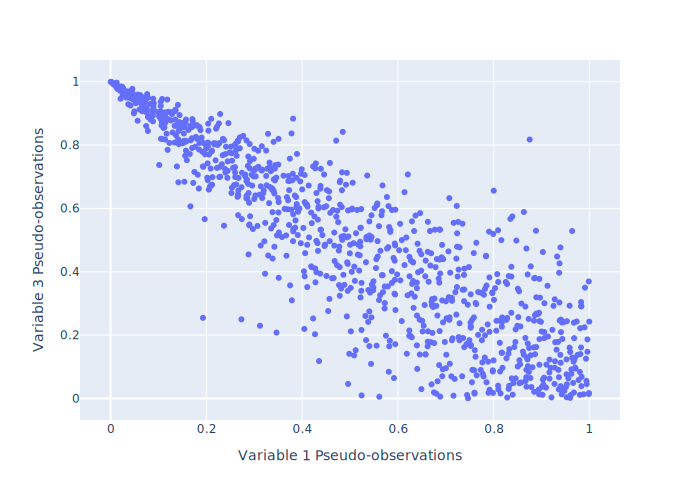

In [9]:
fig = px.scatter(
    x=cop_sims[:, 0],
    y=cop_sims[:, 2],
    labels={
        "x": "Variable 1 Pseudo-observations",
        "y": "Variable 3 Pseudo-observations"
    }
)
fig.show(renderer="svg")

In [10]:
px.scatter(
    x=cop_sims[:, 1],
    y=cop_sims[:, 2],
    labels={
        "x": "Variable 2 Pseudo-observations",
        "y": "Variable 3 Pseudo-observations"
    }
)